In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
std2 = pd.read_excel('../Data/Kinga-qaqc(copy).xlsx', sheet_name = 'STD2')
columns = std2.columns[:35]
std2 = std2[columns]

In [97]:
std2.head()

,Received,Reported,Certificate,Sample Type,Sample Number,H2O,Cu,Cu(R),Co,Co(R),...,ASCu vs Assay Mean,ASCU Assay Mean,Co EV,Co (2stdev),Co UL,Co LL,Co - Assay Mean,Co - Assay Mean.1,Co vs Assay Mean,Co vs EV
0,2016-06-20,2016-07-05,LB16-00489,STD2,V7020,-,0.69,-,0.005,-,...,0.540000,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.005000,0.005032
1,2016-06-20,2016-07-05,LB16-00490,STD2,V7040,-,0.72,-,0.005,-,...,0.525921,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.004968,0.005032
2,2016-06-20,2016-07-05,LB16-00491,STD2,V7060,-,0.71,-,0.005,-,...,0.491842,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.004936,0.005032
3,2016-06-20,2016-07-05,LB16-00492,STD2,V7080,0.05,0.70,0.72,0.005,0.005,...,0.467763,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.004904,0.005032
4,2016-06-20,2016-07-05,LB16-00493,STD2,V7100,-,0.71,-,0.005,-,...,0.453684,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.004872,0.005032


In [98]:
def numeric(df, columns):
    for i in columns:
        df[i] = pd.to_numeric(df[i], errors = 'coerce')
        df[i] = df[i].astype(float)

In [99]:
num_cols = std2.columns[5:]

In [100]:
numeric(std2, num_cols)

In [101]:
std2.head()

,Received,Reported,Certificate,Sample Type,Sample Number,H2O,Cu,Cu(R),Co,Co(R),...,ASCu vs Assay Mean,ASCU Assay Mean,Co EV,Co (2stdev),Co UL,Co LL,Co - Assay Mean,Co - Assay Mean.1,Co vs Assay Mean,Co vs EV
0,2016-06-20,2016-07-05,LB16-00489,STD2,V7020,NaN,0.69,NaN,0.005,NaN,...,0.540000,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.005000,0.005032
1,2016-06-20,2016-07-05,LB16-00490,STD2,V7040,NaN,0.72,NaN,0.005,NaN,...,0.525921,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.004968,0.005032
2,2016-06-20,2016-07-05,LB16-00491,STD2,V7060,NaN,0.71,NaN,0.005,NaN,...,0.491842,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.004936,0.005032
3,2016-06-20,2016-07-05,LB16-00492,STD2,V7080,0.05,0.70,0.72,0.005,0.005,...,0.467763,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.004904,0.005032
4,2016-06-20,2016-07-05,LB16-00493,STD2,V7100,NaN,0.71,NaN,0.005,NaN,...,0.453684,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.004872,0.005032


In [102]:
column_type_table = pd.DataFrame(zip(std2.dtypes.index, std2.dtypes),
                                 columns=['Column', 'Data Type']).set_index('Column')

column_type_table

,Data Type
Column,
Received,datetime64[ns]
Reported,datetime64[ns]
Certificate,object
Sample Type,object
Sample Number,object
H2O,float64
Cu,float64
Cu(R),float64
Co,float64


In [103]:
std2['Certificate number'] = std2['Certificate'].apply(lambda x: x.split('-')[1])
std2 = std2[std2['Certificate number'].str.endswith('A')==False]
std2['Certificate number'] = std2['Certificate number'].astype(int)

In [104]:
def standard_control_plot(df, columns, title):
    df = df.groupby('Certificate number')[columns].agg('mean').sort_values('Certificate number')
    return df.plot(kind = 'line', figsize = (20,6), title = title)

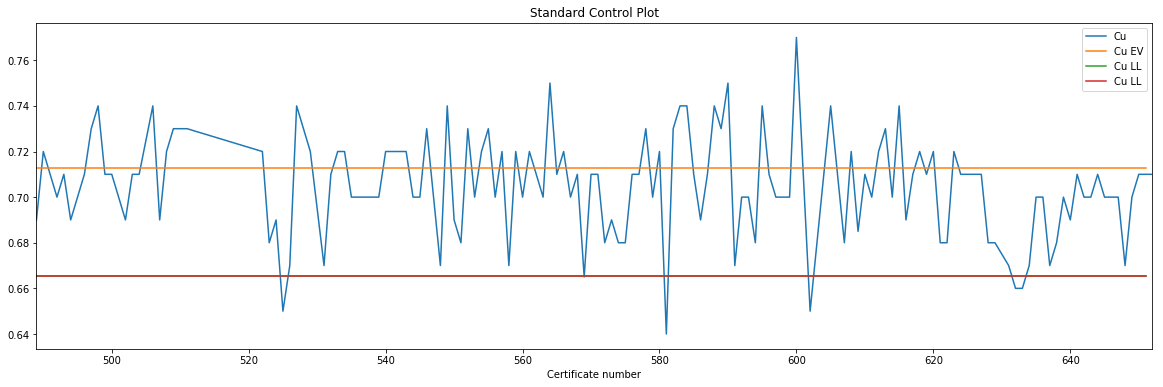

In [140]:
standard_control_plot(std2, ['Cu', 'Cu EV', 'Cu LL', 'Cu LL'], 'Standard Control Plot')

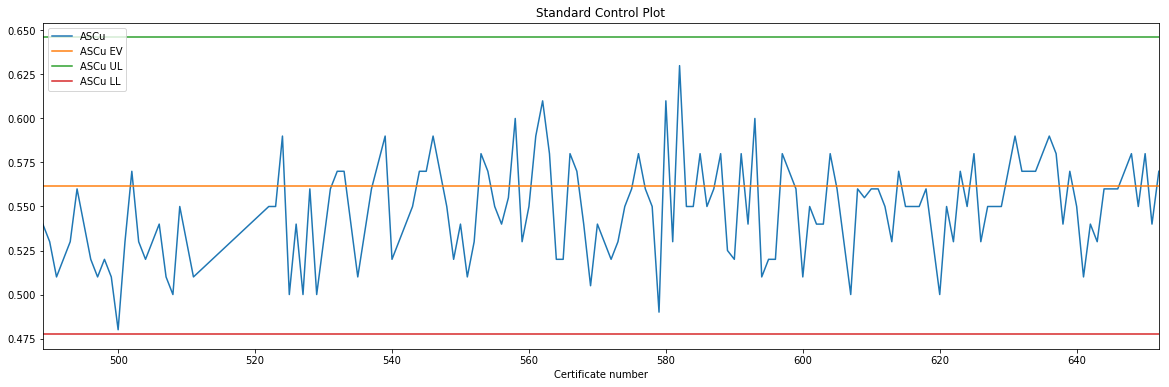

In [141]:
ASCu = ['ASCu', 'ASCu EV', 'ASCu UL', 'ASCu LL']
standard_control_plot(std2, ASCu, 'Standard Control Plot')

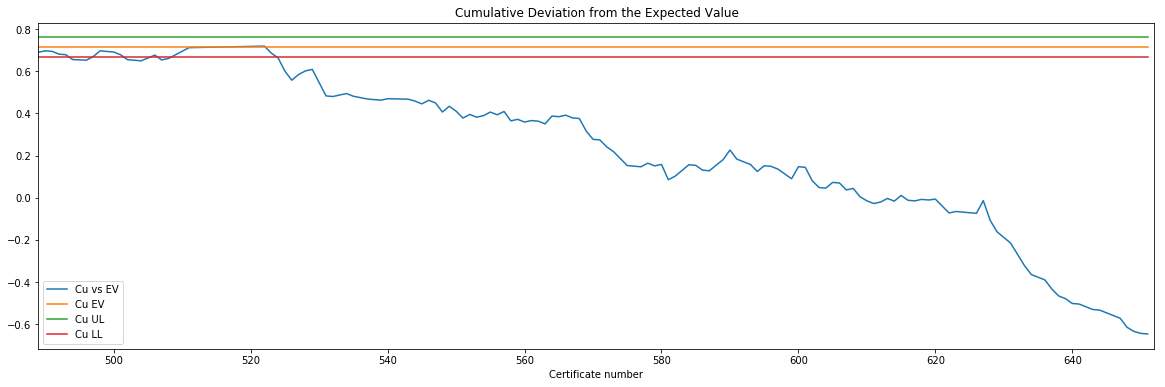

In [142]:
CuvsEV = ['Cu vs EV','Cu EV', 'Cu UL', 'Cu LL' ]
standard_control_plot(std2, CuvsEV, 'Cumulative Deviation from the Expected Value')

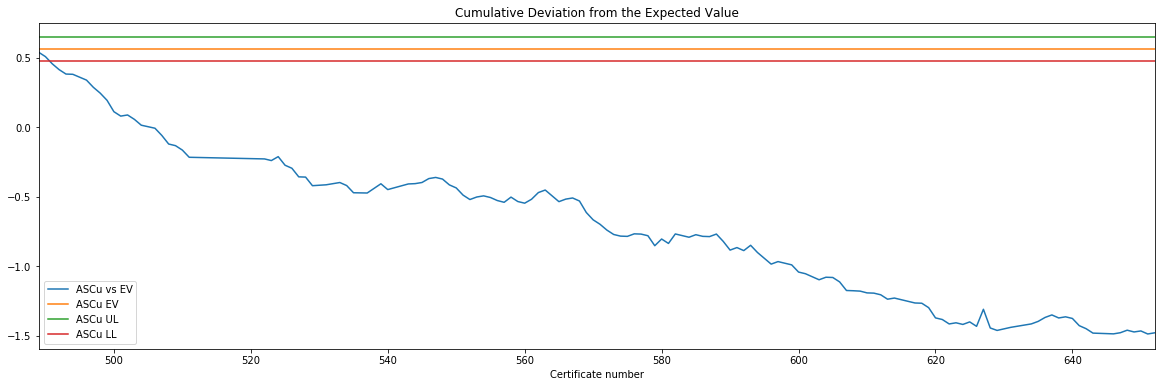

In [143]:
ASCu_vs_EV = ['ASCu vs EV','ASCu EV', 'ASCu UL', 'ASCu LL']
standard_control_plot(std2, ASCu_vs_EV, 'Cumulative Deviation from the Expected Value')

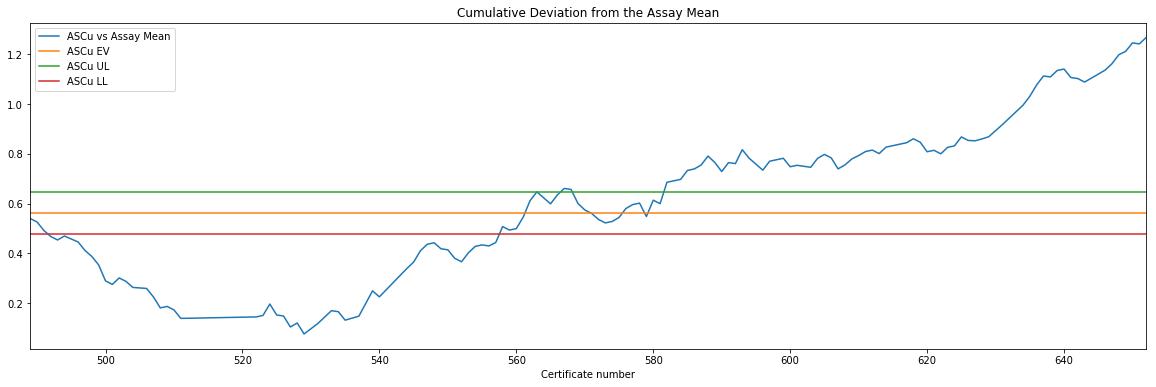

In [144]:
ascu_assay = ['ASCu vs Assay Mean','ASCu EV', 'ASCu UL', 'ASCu LL']
standard_control_plot(std2, ascu_assay,'Cumulative Deviation from the Assay Mean')

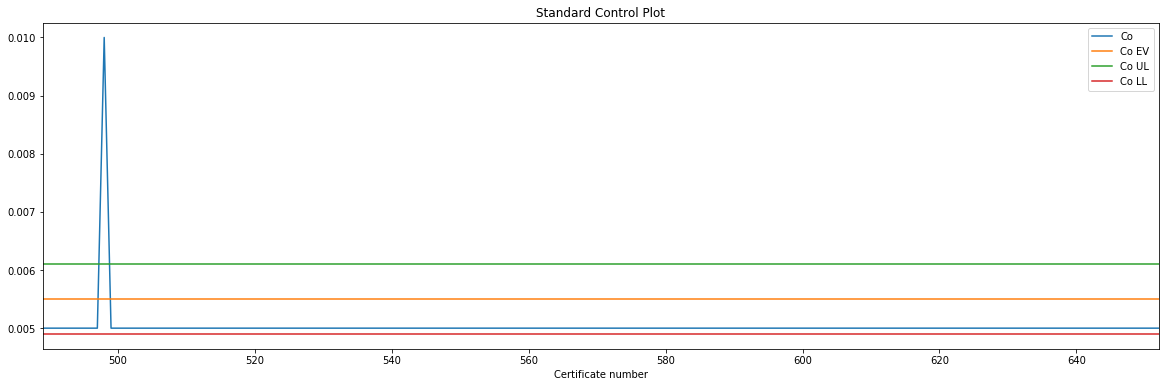

In [145]:
co = [ 'Co','Co EV', 'Co UL', 'Co LL']
standard_control_plot(std2, co, 'Standard Control Plot')

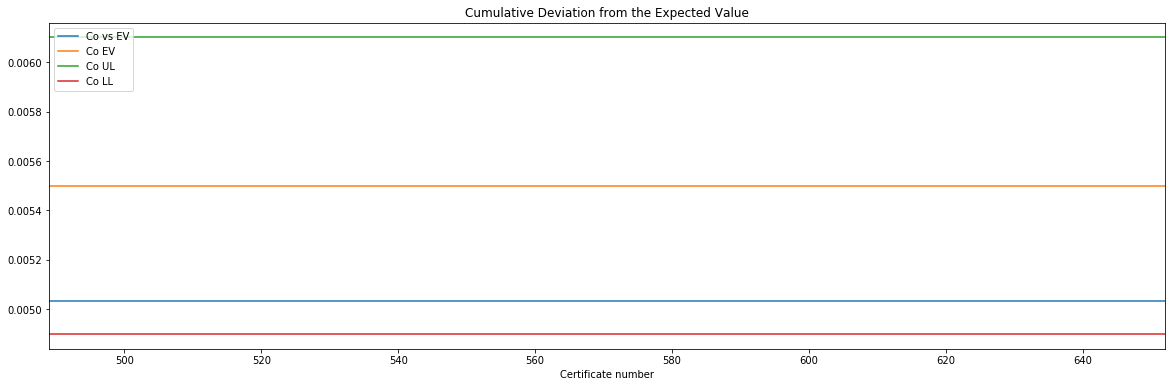

In [146]:
co_ev = ['Co vs EV','Co EV', 'Co UL', 'Co LL']
standard_control_plot(std2, co_ev, 'Cumulative Deviation from the Expected Value')

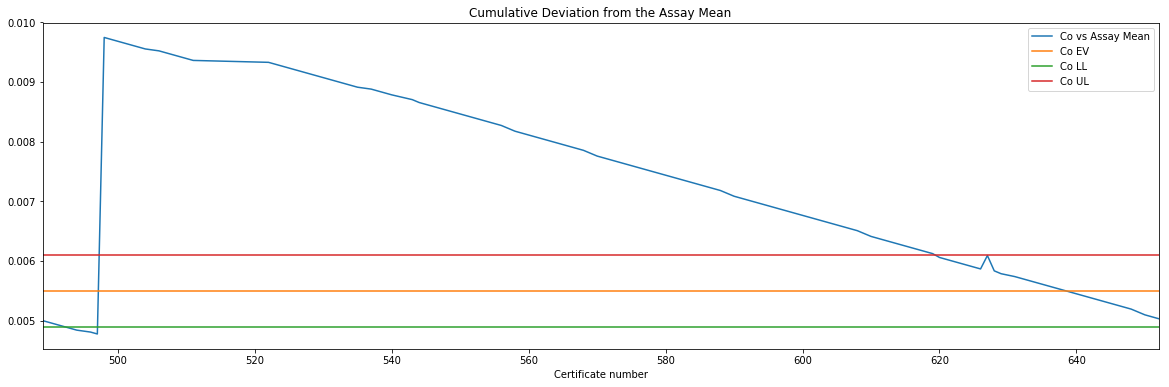

In [149]:
co_assay = ['Co vs Assay Mean','Co EV', 'Co LL', 'Co UL']
standard_control_plot(std2, co_assay, 'Cumulative Deviation from the Assay Mean')

In [154]:
std2[std2['Certificate number']> 620].groupby

,Received,Reported,Certificate,Sample Type,Sample Number,H2O,Cu,Cu(R),Co,Co(R),...,ASCU Assay Mean,Co EV,Co (2stdev),Co UL,Co LL,Co - Assay Mean,Co - Assay Mean.1,Co vs Assay Mean,Co vs EV,Certificate number
122,2016-08-24,2016-09-07,LB16-00627,Std1,V9650,NaN,0.71,NaN,0.005,NaN,...,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.006090,0.005032,627
124,2016-08-24,2016-09-07,LB16-00621,STD2,V9530,NaN,0.68,NaN,0.005,NaN,...,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.006026,0.005032,621
125,2016-08-24,2016-09-07,LB16-00622,STD2,V9550,NaN,0.68,NaN,0.005,NaN,...,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.005994,0.005032,622
126,2016-08-24,2016-09-07,LB16-00623,STD2,V9570,NaN,0.72,NaN,0.005,NaN,...,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.005962,0.005032,623
127,2016-08-24,2016-09-07,LB16-00624,STD2,V9590,NaN,0.71,0.71,0.005,0.005,...,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.005929,0.005032,624
128,2016-08-24,2016-09-07,LB16-00625,STD2,V9610,NaN,0.71,NaN,0.005,NaN,...,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.005897,0.005032,625
129,2016-08-24,2016-09-07,LB16-00626,STD2,V9630,NaN,0.71,NaN,0.005,NaN,...,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.005865,0.005032,626
130,2016-08-24,2016-09-07,LB16-00628,STD2,V9670,NaN,0.68,NaN,0.005,NaN,...,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.005833,0.005032,628
131,2016-08-24,2016-09-07,LB16-00629,STD2,V9690,NaN,0.67,0.68,0.005,0.005,...,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.005801,0.005032,629
132,2016-08-24,2016-09-07,LB16-00629,STD2,V9710,NaN,0.69,NaN,0.005,NaN,...,0.544079,0.0055,0.0006,0.0061,0.0049,0.005032,0.005032,0.005769,0.005032,629
